<a href="https://colab.research.google.com/github/csr911/NNML/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Trees

  Decision trees are a popular machine learning algorithm used for both classification and regression tasks. They are powerful and interpretable models that make predictions by creating a tree-like flowchart structure based on the features of the input data.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
iris_df = pd.read_csv('https://github.com/GPShiva/Sparks-Internship/blob/main/Iris.csv?raw=true',index_col = 'Id')
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.Species.value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#checking for null values
iris_df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

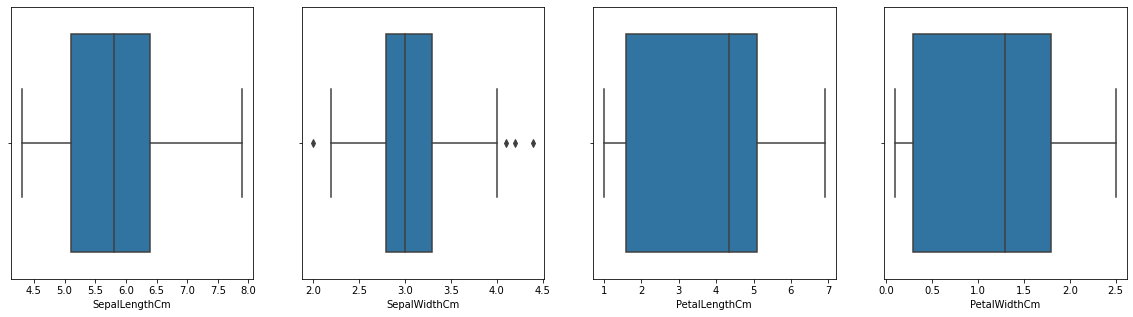

In [ ]:
#checking for outliers
#What are outliers in classification problem?
#Image result for outliers means in decision tree
#Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values

plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.boxplot(iris_df[i])
    j+=1

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

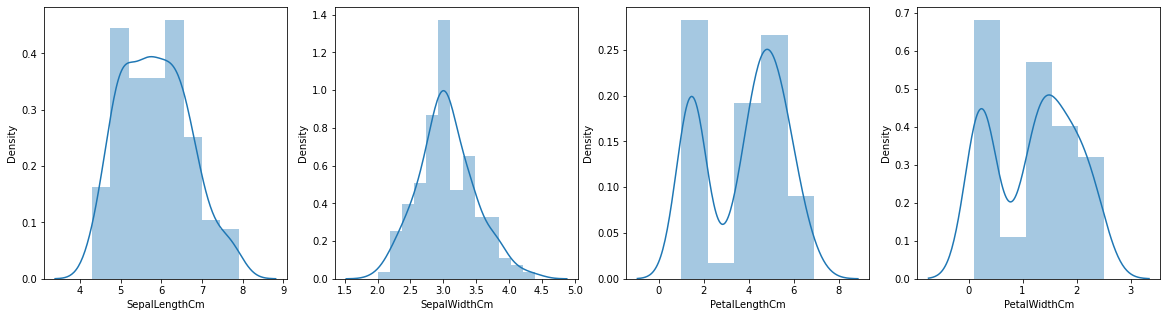

In [ ]:
#checking for distribution
plt.figure(figsize=(20,5))
j = 1
for i in iris_df.iloc[:,:-1].columns:
    plt.subplot(1,4,j)
    sns.distplot(iris_df[i])
    j+=1

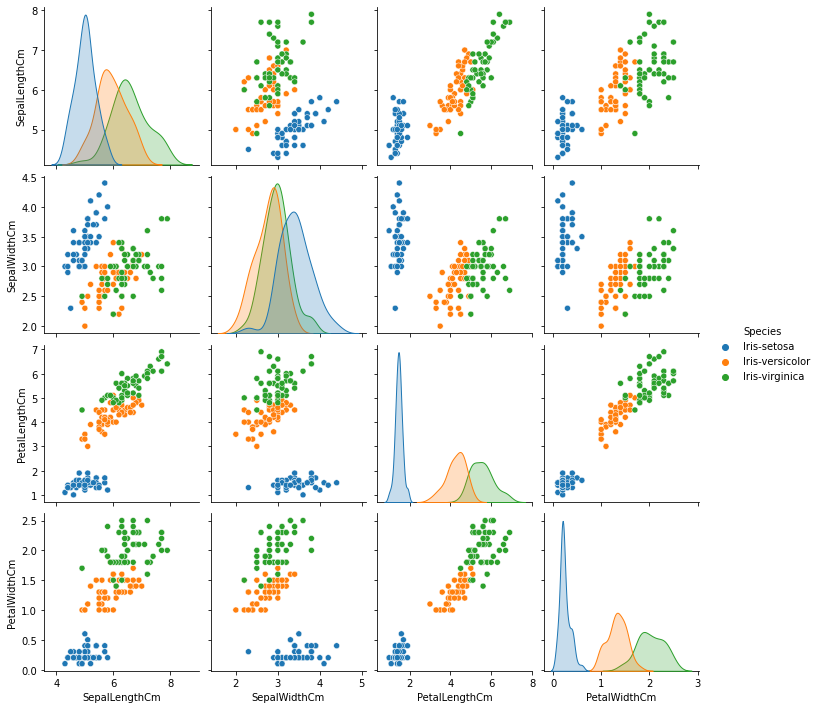

In [ ]:
sns.pairplot(iris_df,hue='Species')
plt.show()

In [ ]:
#data processing
X = iris_df.drop('Species',axis=1)
y = iris_df.Species
X.shape, y.shape

((150, 4), (150,))

In [ ]:
#train test spilt
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=100)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
#model building
#Using Decision Tree Classifier
#Using GridSearchCV to get best parameters which will not make model overfit
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['entropy', 'gini'], 'max_depth': [5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 3, 5, 7, 9]}
gs = GridSearchCV(DecisionTreeClassifier(), params, cv=10, n_jobs=-1, verbose=1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 3, 5, 7, 9]},
             verbose=1)

In [ ]:
print('Score:',gs.best_score_,'\nParameters:', gs.best_params_)

Score: 0.9818181818181818 
Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}


In [ ]:
best_classifier = gs.best_estimator_
best_classifier


DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = best_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]])

In [ ]:
#model evalution
#Calculating Accuracy on the test data
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


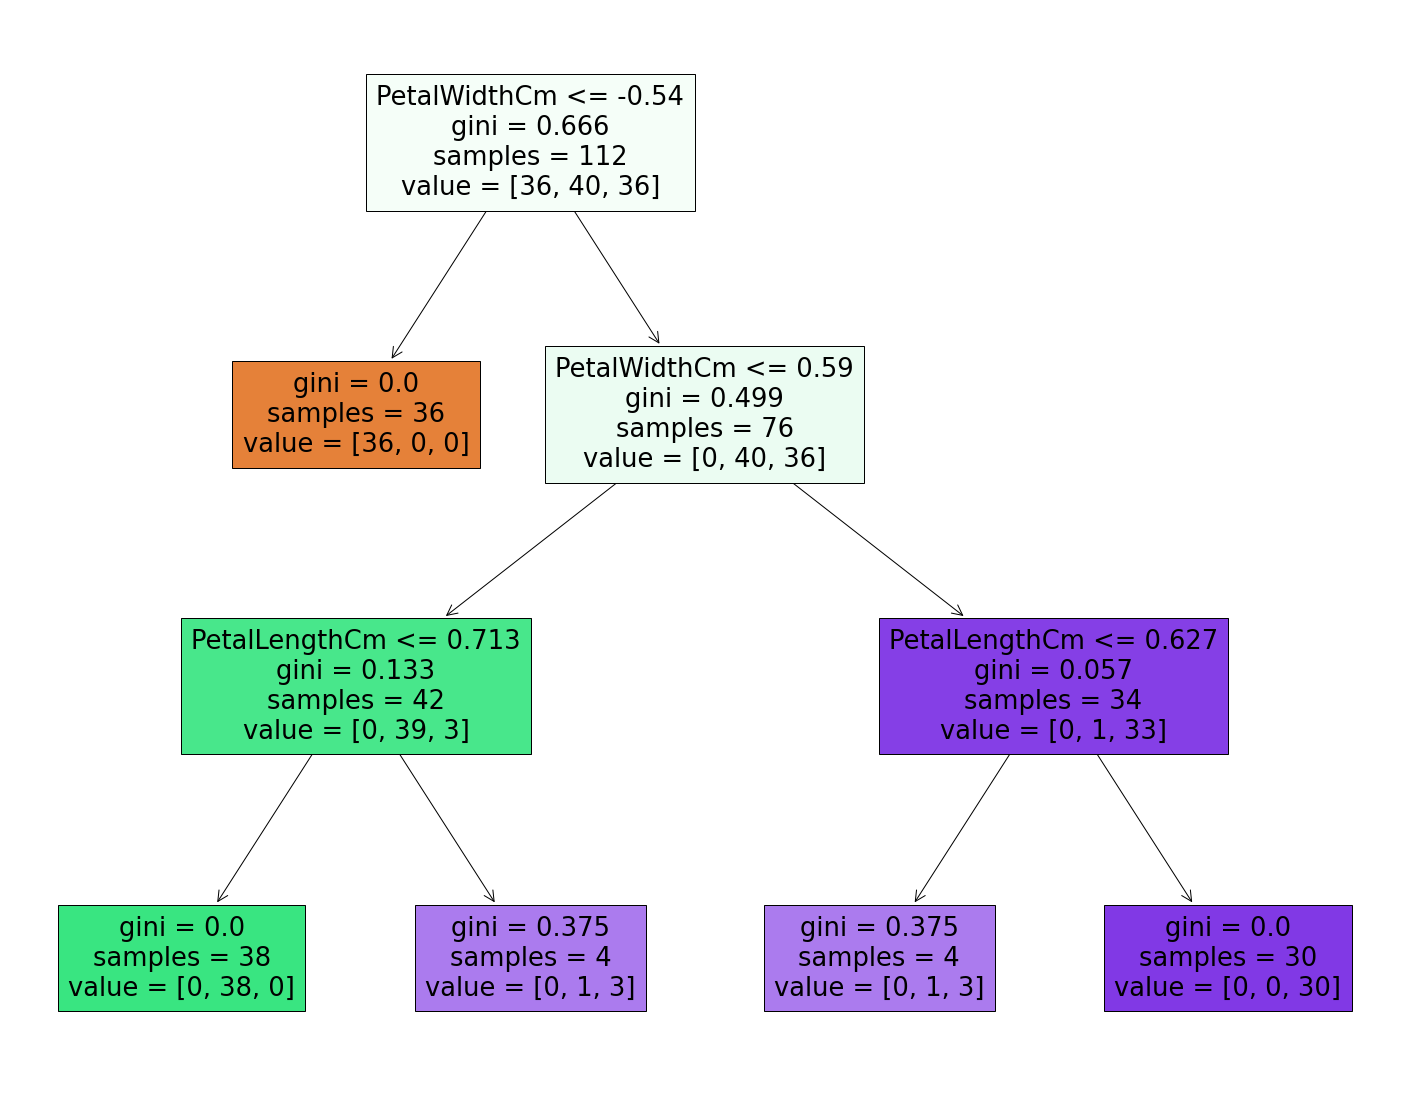

In [ ]:
#Visualizing the Decision Tree Model
from sklearn import tree

fig = plt.figure(figsize=(25,20))
tree.plot_tree(best_classifier, feature_names=iris_df.columns, filled=True)
plt.show()

**Result :**

  Hence, we implemented the decision tree.